In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

from sklearn import model_selection
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

**Load the Dataset**

In [2]:
patient_df = pd.read_csv("parkinsons.data")
patient_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Analysing the Dataset**

In [3]:
#check for the shape of the dataset
patient_df.shape

(195, 24)

In [4]:
#check for the feature information of the dataset
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

**Observations:**
- We can remove the feature "name" since it does not contribute to the dependent feature "status" in any way.
- There is no-null value in our dataset.

In [5]:
#checking the statistics of the different features
patient_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


**Observations:**
- From the above data, there seems to be a big difference between the mean and median of "MDVP:Fhi(Hz)" and "MDVP:Flo(Hz)" and they need further analysis.

**Univariate Analysis**

In [6]:
# checking count of zeros in all the columns to check for missing values
patient_df[patient_df == 0].count()

name                 0
MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)         0
MDVP:Flo(Hz)         0
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer(dB)     0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
status              48
RPDE                 0
DFA                  0
spread1              0
spread2              0
D2                   0
PPE                  0
dtype: int64

**Observation:**
- From the above results, we can say there is no zero value in any of the independent columns

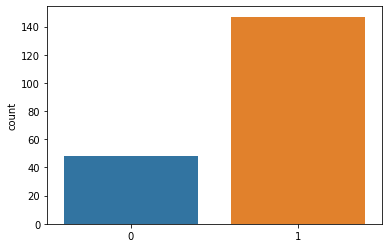

In [7]:
#checking count of each unique values in the dependent feature
sns.countplot(patient_df['status'].values)

**Observations:**
- There are more cases of Parkinsons positive results in the dataset. Hence, the model will be lenient towards a positive scenario.

**Feature name: MDVP:Fo(Hz)**

In [8]:
sc.stats.skew(patient_df['MDVP:Fo(Hz)'])

0.5871758758264713

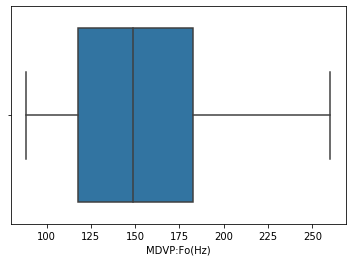

In [9]:
sns.boxplot(x=patient_df['MDVP:Fo(Hz)'])

**Observation:**
- The feature does not seem to be much skewed.
- From the above box plot, there seems to be no outlier in the feature.

**Feature name: MDVP:Fhi(Hz)**

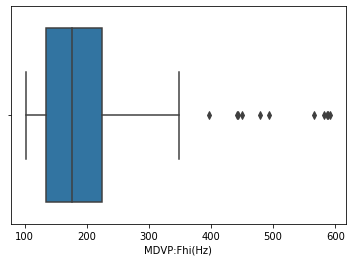

In [10]:
sns.boxplot(x=patient_df['MDVP:Fhi(Hz)'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


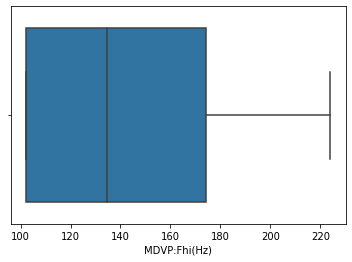

In [11]:
# Handling the outliers

min_val = np.min(patient_df['MDVP:Fhi(Hz)'])
upper_lim = patient_df['MDVP:Fhi(Hz)'].quantile(.75)
patient_df['MDVP:Fhi(Hz)'][patient_df['MDVP:Fhi(Hz)'] > upper_lim] = min_val

sns.boxplot(x=patient_df['MDVP:Fhi(Hz)'])

In [12]:
sc.stats.skew(patient_df['MDVP:Fhi(Hz)'])

0.5054669037578845

**Observation:**
- The feature does not seem to be much skewed.

**Feature name: MDVP:Flo(Hz)**

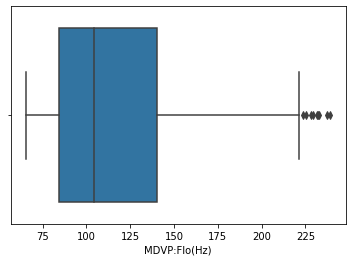

In [13]:
sns.boxplot(x=patient_df['MDVP:Flo(Hz)'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


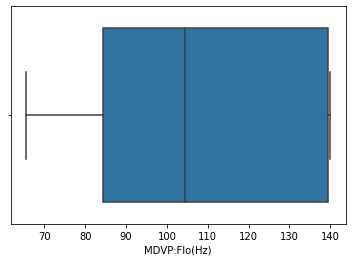

In [14]:
# Handling the outliers

upper_lim = patient_df['MDVP:Flo(Hz)'].quantile(.75)
patient_df['MDVP:Flo(Hz)'][patient_df['MDVP:Flo(Hz)'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:Flo(Hz)'])

In [15]:
sc.stats.skew(patient_df['MDVP:Flo(Hz)'])

0.16323770230815302

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:Jitter(%)**

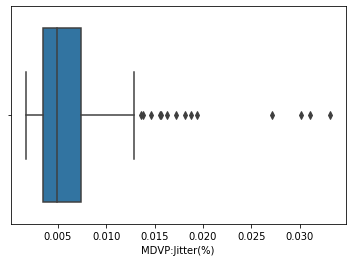

In [16]:
sns.boxplot(x=patient_df['MDVP:Jitter(%)'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


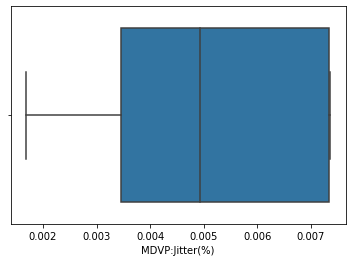

In [17]:
# Handling the outliers

min_val = np.min(patient_df['MDVP:Jitter(%)'])
upper_lim = patient_df['MDVP:Jitter(%)'].quantile(.75)
patient_df['MDVP:Jitter(%)'][patient_df['MDVP:Jitter(%)'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:Jitter(%)'])

In [18]:
sc.stats.skew(patient_df['MDVP:Jitter(%)'])

-0.039133377754540684

**Observation:**

- The feature does not seem to be much skewed.

**Feature Name: MDVP:Jitter(Abs)**

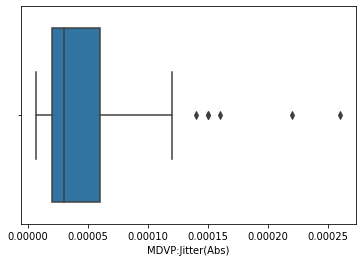

In [19]:
sns.boxplot(x=patient_df['MDVP:Jitter(Abs)'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


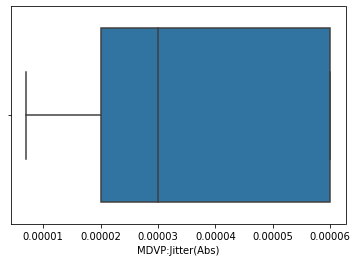

In [20]:
# Handling the outliers

upper_lim = patient_df['MDVP:Jitter(Abs)'].quantile(.75)
patient_df['MDVP:Jitter(Abs)'][patient_df['MDVP:Jitter(Abs)'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:Jitter(Abs)'])

In [21]:
sc.stats.skew(patient_df['MDVP:Jitter(Abs)'])

0.01068823183960101

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:RAP**

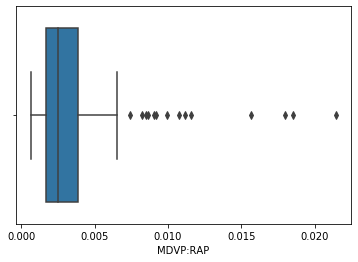

In [22]:
sns.boxplot(x=patient_df['MDVP:RAP'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


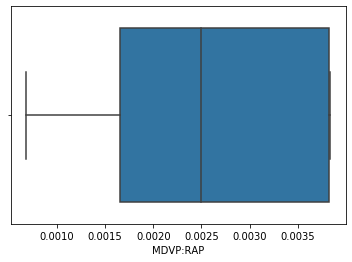

In [23]:
# Handling the outliers

upper_lim = patient_df['MDVP:RAP'].quantile(.75)
patient_df['MDVP:RAP'][patient_df['MDVP:RAP'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:RAP'])

In [24]:
sc.stats.skew(patient_df['MDVP:RAP'])

-0.004683202659573687

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:PPQ**

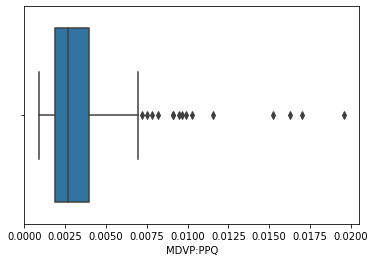

In [25]:
sns.boxplot(x=patient_df['MDVP:PPQ'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


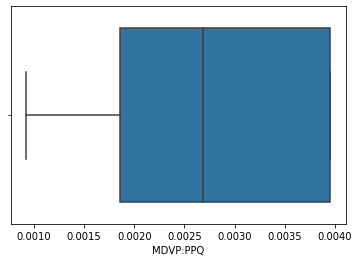

In [26]:
# Handling the outliers

upper_lim = patient_df['MDVP:PPQ'].quantile(.75)
patient_df['MDVP:PPQ'][patient_df['MDVP:PPQ'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:PPQ'])

In [27]:
sc.stats.skew(patient_df['MDVP:PPQ'])

-0.05349564993502483

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: Jitter:DDP**

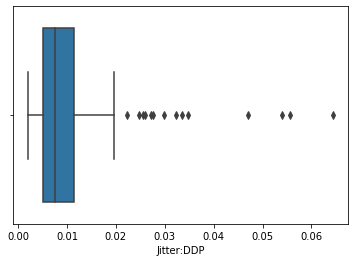

In [28]:
sns.boxplot(x=patient_df['Jitter:DDP'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


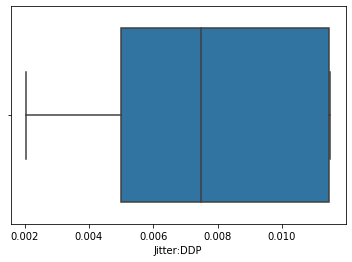

In [29]:
# Handling the outliers

upper_lim = patient_df['Jitter:DDP'].quantile(.75)
patient_df['Jitter:DDP'][patient_df['Jitter:DDP'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['Jitter:DDP'])

In [30]:
sc.stats.skew(patient_df['Jitter:DDP'])

-0.004843161092743241

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:Shimmer**

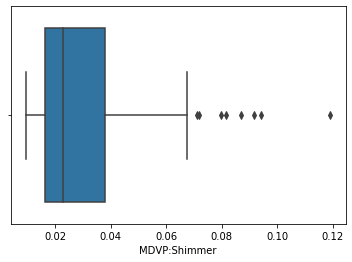

In [31]:
sns.boxplot(x=patient_df['MDVP:Shimmer'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


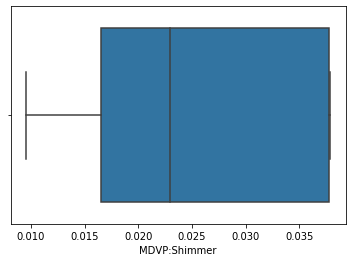

In [32]:
# Handling the outliers

upper_lim = patient_df['MDVP:Shimmer'].quantile(.75)
patient_df['MDVP:Shimmer'][patient_df['MDVP:Shimmer'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:Shimmer'])

In [33]:
sc.stats.skew(patient_df['MDVP:Shimmer'])

0.13659643655765746

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:Shimmer(dB)**

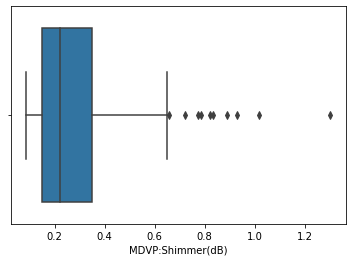

In [34]:
sns.boxplot(x=patient_df['MDVP:Shimmer(dB)'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


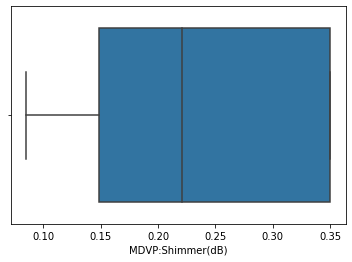

In [35]:
# Handling the outliers

upper_lim = patient_df['MDVP:Shimmer(dB)'].quantile(.75)
patient_df['MDVP:Shimmer(dB)'][patient_df['MDVP:Shimmer(dB)'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:Shimmer(dB)'])

In [36]:
sc.stats.skew(patient_df['MDVP:Shimmer(dB)'])

0.1018666782707373

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: Shimmer:APQ3**

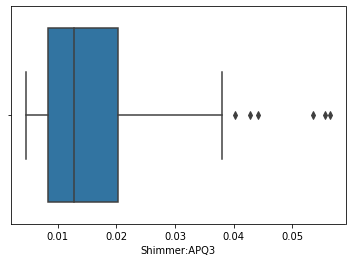

In [37]:
sns.boxplot(x=patient_df['Shimmer:APQ3'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


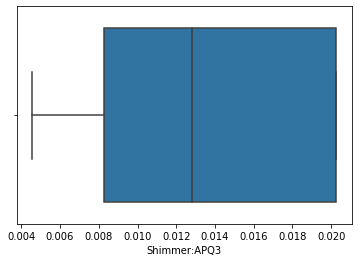

In [38]:
# Handling the outliers

upper_lim = patient_df['Shimmer:APQ3'].quantile(.75)
patient_df['Shimmer:APQ3'][patient_df['Shimmer:APQ3'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['Shimmer:APQ3'])

In [39]:
sc.stats.skew(patient_df['Shimmer:APQ3'])

0.07502062172535424

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: Shimmer:APQ5**

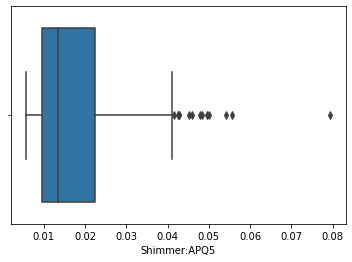

In [40]:
sns.boxplot(x=patient_df['Shimmer:APQ5'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


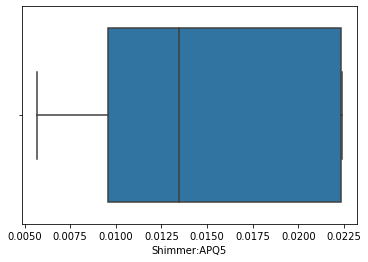

In [41]:
# Handling the outliers

upper_lim = patient_df['Shimmer:APQ5'].quantile(.75)
patient_df['Shimmer:APQ5'][patient_df['Shimmer:APQ5'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['Shimmer:APQ5'])

In [42]:
sc.stats.skew(patient_df['Shimmer:APQ5'])

0.14233507118792213

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: MDVP:APQ**

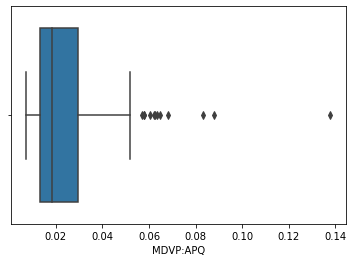

In [43]:
sns.boxplot(x=patient_df['MDVP:APQ'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


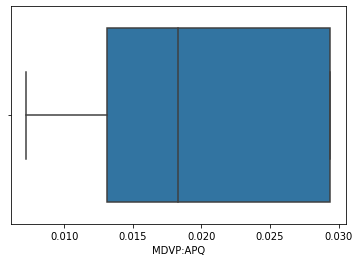

In [44]:
# Handling the outliers

upper_lim = patient_df['MDVP:APQ'].quantile(.75)
patient_df['MDVP:APQ'][patient_df['MDVP:APQ'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['MDVP:APQ'])

In [45]:
sc.stats.skew(patient_df['MDVP:APQ'])

0.12667251681946592

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: Shimmer:DDA**

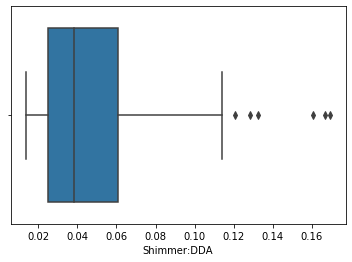

In [46]:
sns.boxplot(x=patient_df['Shimmer:DDA'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


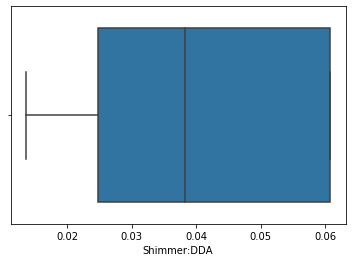

In [47]:
# Handling the outliers

upper_lim = patient_df['Shimmer:DDA'].quantile(.75)
patient_df['Shimmer:DDA'][patient_df['Shimmer:DDA'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['Shimmer:DDA'])

In [48]:
sc.stats.skew(patient_df['Shimmer:DDA'])

0.07502391639653963

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: NHR**

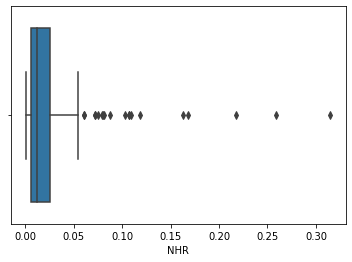

In [49]:
sns.boxplot(x=patient_df['NHR'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


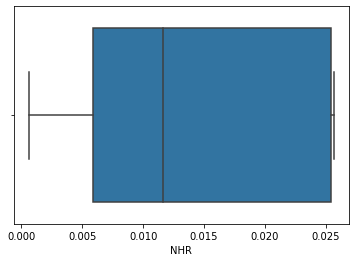

In [50]:
# Handling the outliers

upper_lim = patient_df['NHR'].quantile(.75)
patient_df['NHR'][patient_df['NHR'] > upper_lim] = upper_lim

sns.boxplot(x=patient_df['NHR'])

In [51]:
sc.stats.skew(patient_df['NHR'])

0.22427075144332836

**Observation:**
- The feature does not seem to be much skewed.

**Feature Name: HNR**

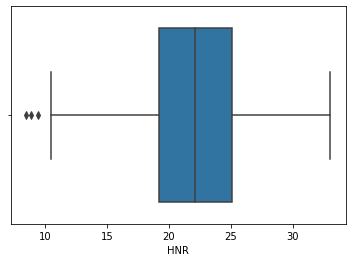

In [52]:
sns.boxplot(x=patient_df['HNR'])

**Observation:**
- The feature seems to be having lot of outliers.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


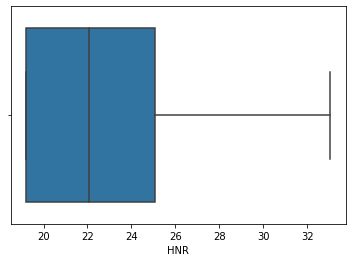

In [53]:
# Handling the outliers

lower_lim = patient_df['HNR'].quantile(.25)
patient_df['HNR'][patient_df['HNR'] < lower_lim] = lower_lim

sns.boxplot(x=patient_df['HNR'])

In [54]:
sc.stats.skew(patient_df['HNR'])

0.7070914194135622

**Observation:**
- The feature seems to be moderately skewed.

In [55]:
# handling the skewness of the feature
patient_df['HNR'] = np.log(patient_df['HNR'])
sc.stats.skew(patient_df['HNR'])

0.4442975498942182

**Bivariate Analysis**

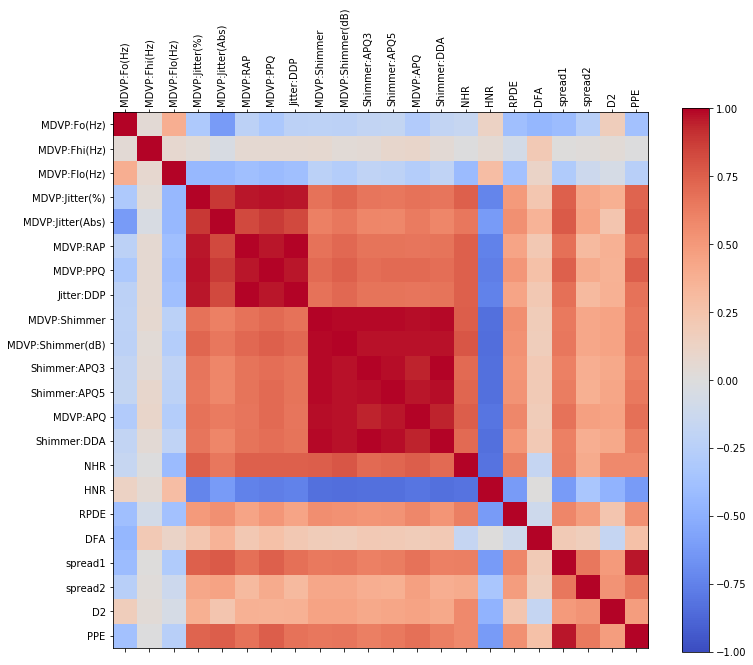

In [56]:
#checking the correlation between the different independent features

df_for_heatmap = patient_df.drop(['name','status'], axis=1)
corr = df_for_heatmap.corr()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_for_heatmap.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_for_heatmap.columns)
ax.set_yticklabels(df_for_heatmap.columns)
plt.show()

**Observations:**
There seems to be high correlation between many features and hence we need to drop few 
- MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter(DDP)
- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA
- PPE and spread1
- HNR with MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA

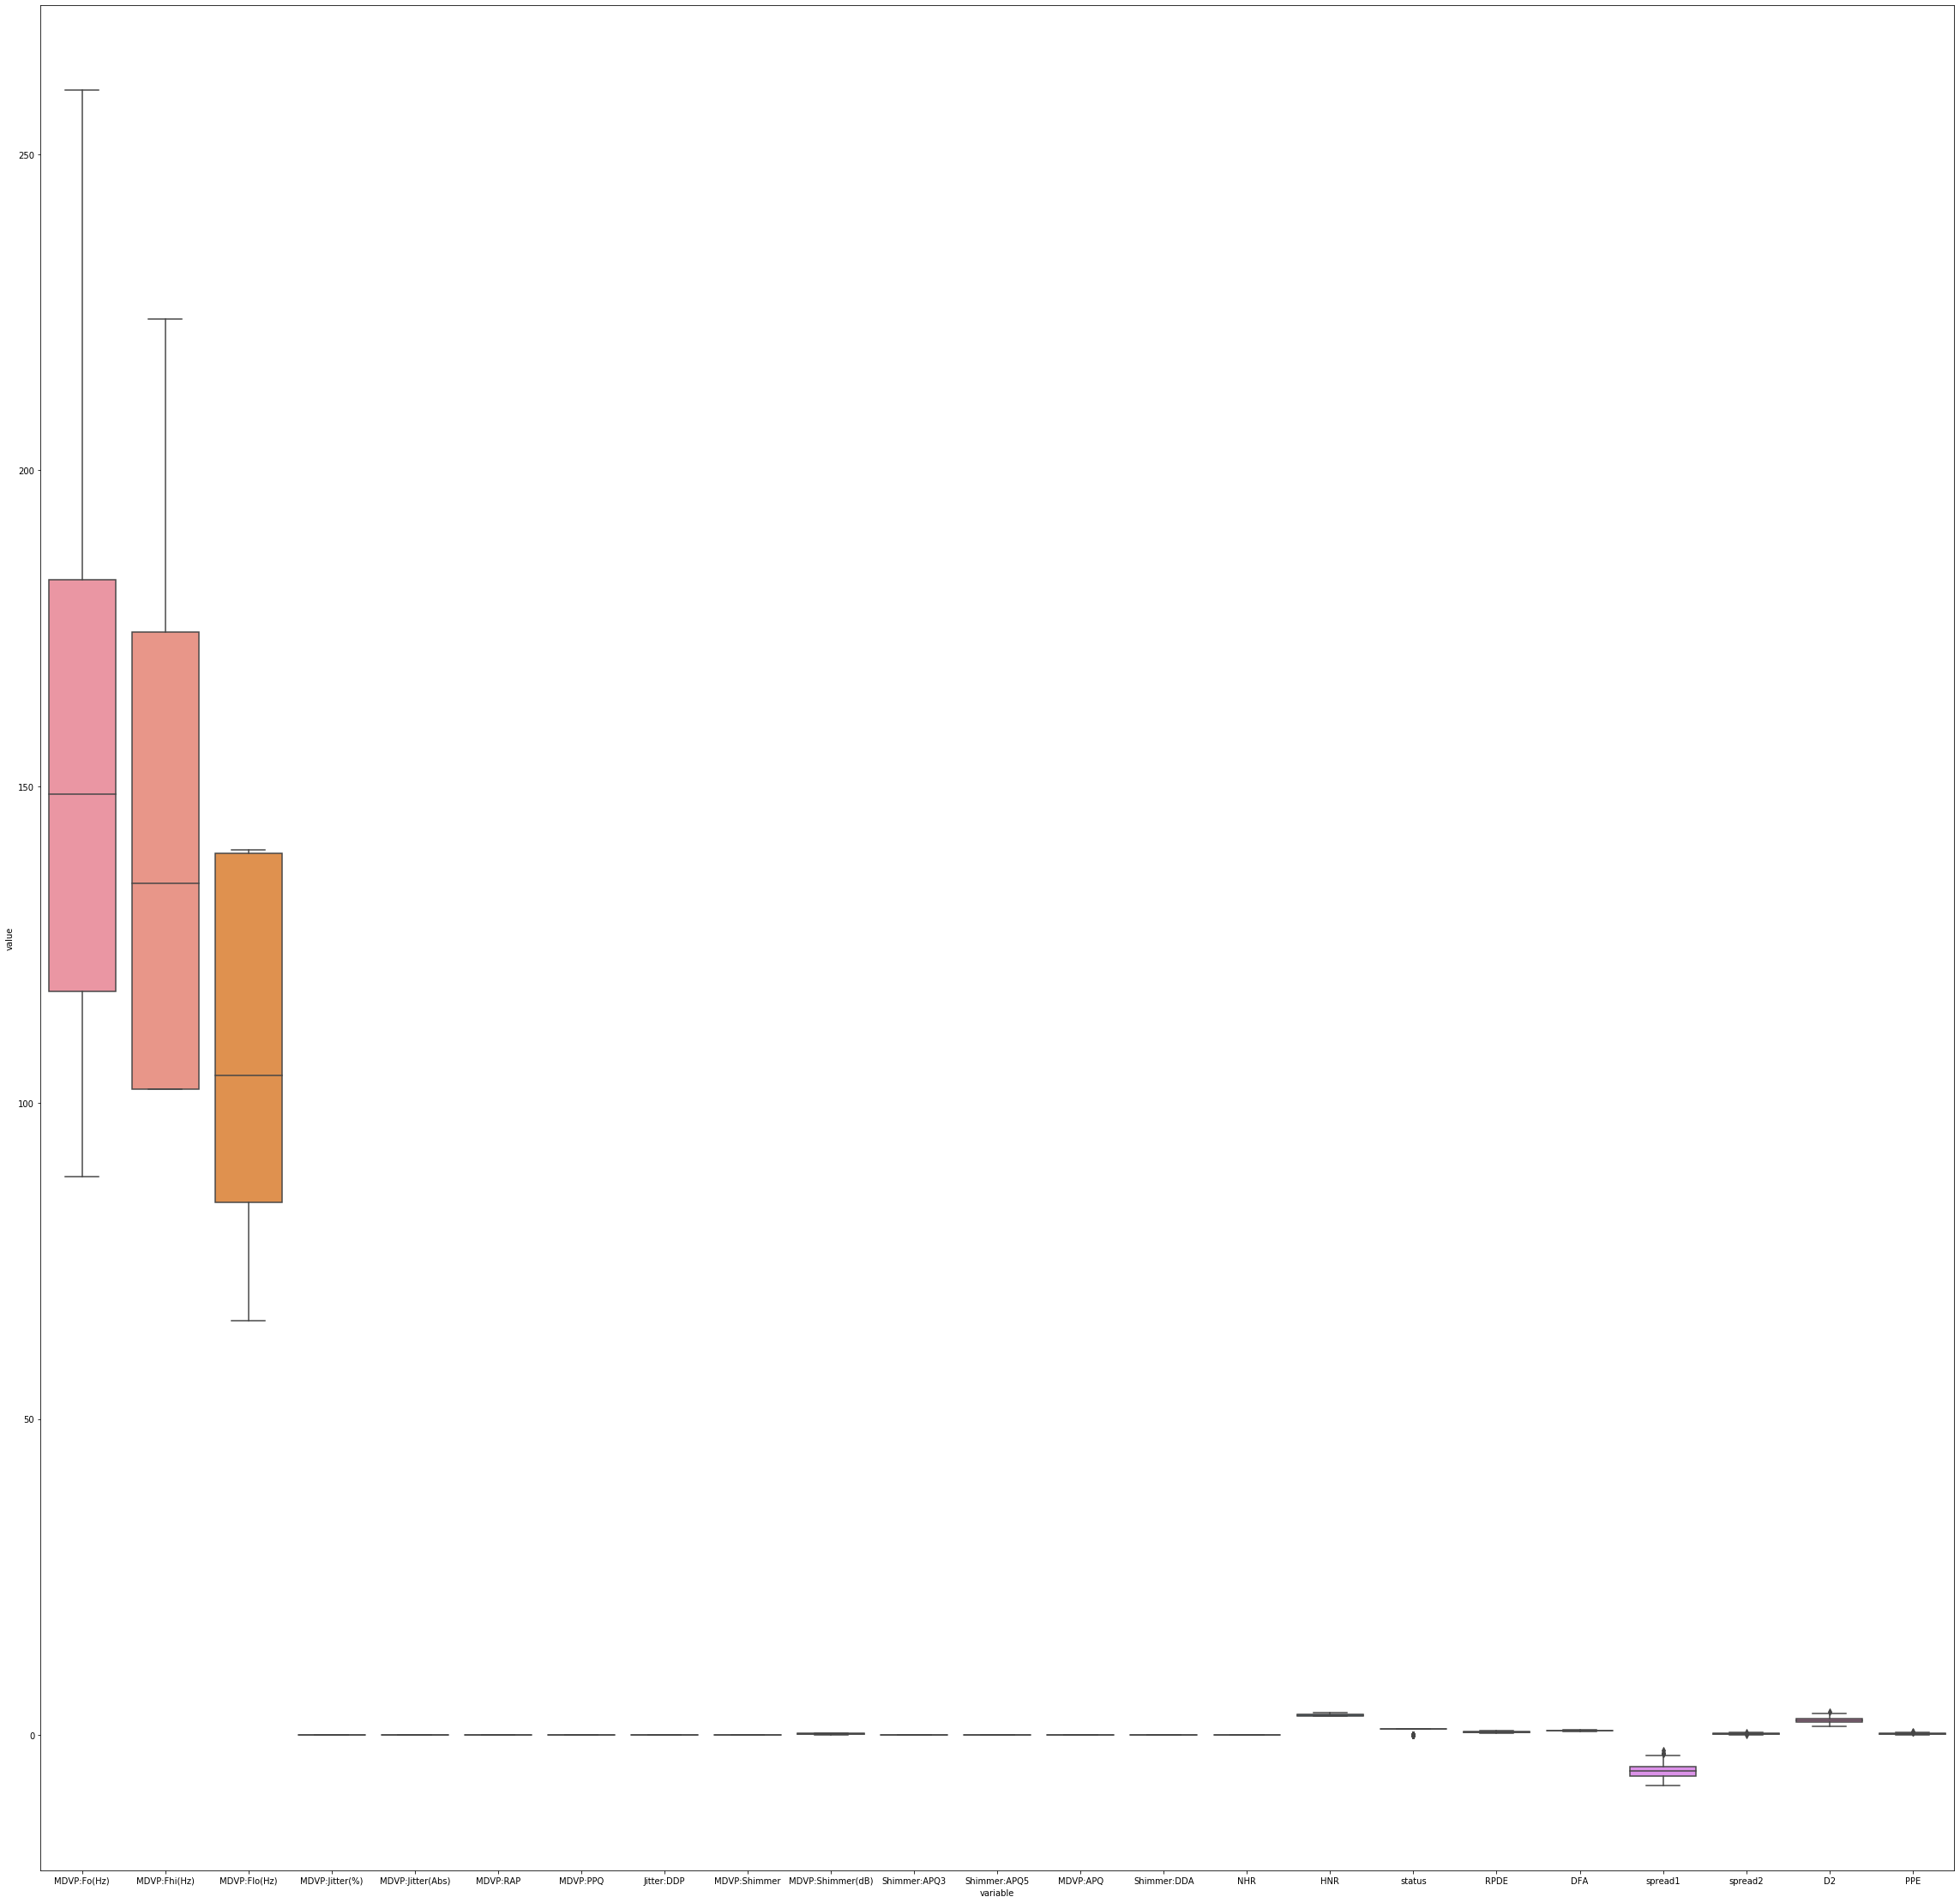

In [57]:
#checking for outliers
fig, ax = plt.subplots(figsize=(40, 40))
sns.boxplot(x="variable", y="value", data=pd.melt(patient_df.iloc[:,1:]), ax=ax)

**Observations:**
- From the above diagram, we find that many of the features are having outliers and need to be handled.

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


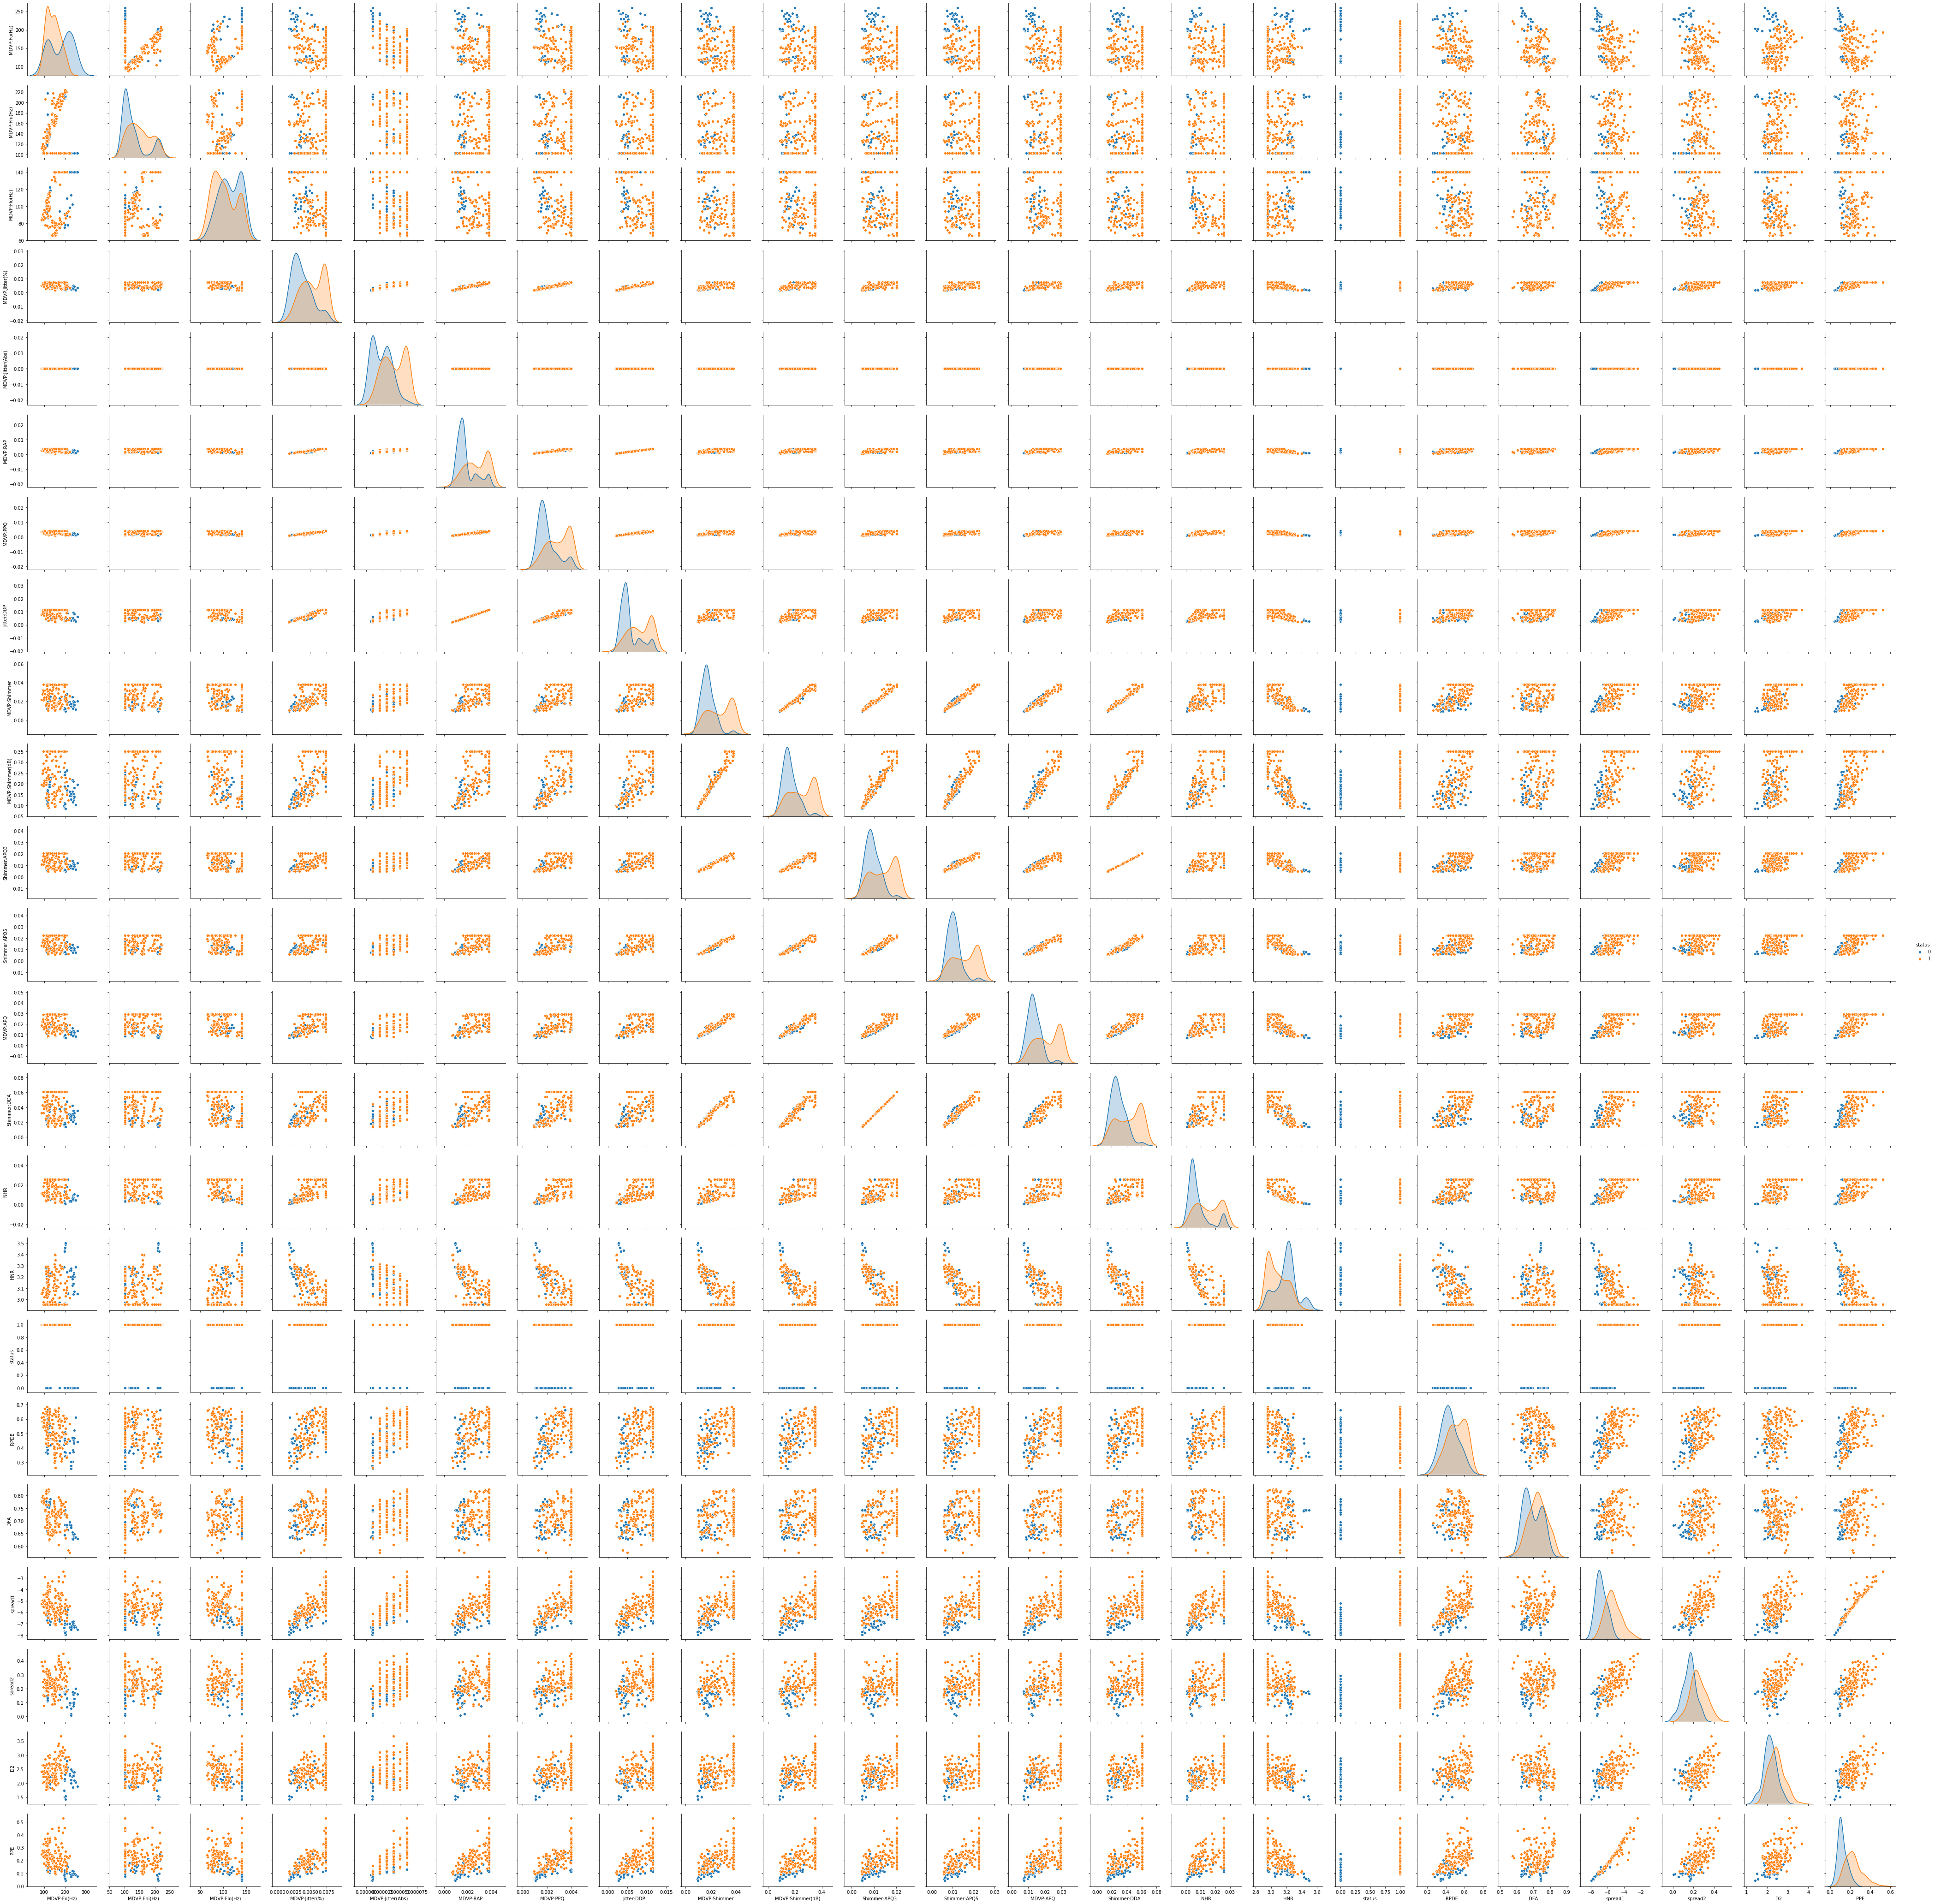

In [58]:
sns.pairplot(patient_df, diag_kind='kde', hue='status')

**Observations:**
- From the above pair plot, we can find that none of the features are highly skewed.
- Also, from the above plot, we find that there is a linear relation (indicating string correlation) between few features.
- Also, we can say that no single feature is capable of predicting the Status individually.

**Building the model with a Decision Tree**

In [59]:
#splitting the dataset into set and labels
y = patient_df['status']
X = patient_df.drop(['status'], axis=1)

In [60]:
#droping the 'name' column
X.drop(['name'], axis=1, inplace=True)

In [61]:
# Splitting the data into test and train
test_size = 0.30
seed = 5
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

In [62]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
dt_model.score(X_test , y_test)

0.9322033898305084

In [64]:
print("Current depth of Decision Tree: ", dt_model.tree_.max_depth)

Current depth of Decision Tree:  5


In [65]:
y_predict = dt_model.predict(X_test)
print("The predicted values: ")
y_predict

The predicted values: 


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [66]:
# cross tab
confusion_matrix(y_test, y_predict)

array([[13,  3],
       [ 1, 42]])

**Building the model with a Regularised Decision Tree**

In [67]:
param_grid = {}

max_depth_list = range(2,6)
param_grid.update(max_depth=max_depth_list)

min_sample_leaf_list = range(2,6)
param_grid.update(min_samples_leaf=min_sample_leaf_list)

dt_model_reg = DecisionTreeClassifier(criterion='entropy')
dt_model_reg_grid = GridSearchCV(dt_model_reg, param_grid, cv=10, scoring='accuracy')
dt_model_reg_grid.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 6),
                         'min_samples_leaf': range(2, 6)},
             pre_dispa

In [68]:
print(dt_model_reg_grid.best_score_)
print(dt_model_reg_grid.best_params_)

0.8455882352941176
{'max_depth': 5, 'min_samples_leaf': 3}


In [69]:
dt_model_reg = DecisionTreeClassifier(criterion='entropy', max_depth=dt_model_reg_grid.best_params_['max_depth'], min_samples_leaf=dt_model_reg_grid.best_params_['min_samples_leaf'])
dt_model_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
dt_model_reg.score(X_test , y_test)

0.8983050847457628

In [71]:
print("Current depth of Decision Tree: ", dt_model_reg.tree_.max_depth)

Current depth of Decision Tree:  5


**Observation:**

From the above results, we find that the after regularisation, the depth of the decision tree has reduced from 5 to 4. Also the accuracy score of the graph has reduced to 89.8%(approx) from 93.2%(approx) which was too high and indicated overfitting. 

Thus,we can say, that Regularisation helps us in preventting overfitting in the model.

**Building the model with a Random Tree**

In [72]:
base_estimator_count_list = range(10,101)

param_grid = dict(n_estimators=base_estimator_count_list)

rfcl = RandomForestClassifier()
rt_model_grid = GridSearchCV(rfcl, param_grid, cv=10, scoring='accuracy')
rt_model_grid.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [73]:
print(rt_model_grid.best_score_)
print(rt_model_grid.best_params_)

0.9191176470588235
{'n_estimators': 23}


In [74]:
rfcl = RandomForestClassifier(n_estimators=rt_model_grid.best_params_['n_estimators'])
rfcl.fit(X_train,y_train)
rfcl.score(X_test , y_test)

0.9152542372881356